# Machine Learning Pipeline - Model Training

In this notebook, we pick up the transformed datasets and the selected variables that we saved in the previous notebooks.

# Reproducibility: Setting the seed

With the aim to ensure reproducibility between runs of the same notebook, but also between the research and production environment, for each step that includes some element of randomness, it is extremely important that we **set the seed**.

In [2]:
import os

# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# to save the model
import joblib

# to build the model
from sklearn.linear_model import Lasso

# to evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [3]:
# load the train and test set with the engineered variables

# we built and saved these datasets in a previous notebook.
# If you haven't done so, go ahead and check the previous notebooks (step 2)
# to find out how to create these datasets

datadir = os.path.join(os.getcwd(), 'dataset')
X_train = pd.read_csv(os.path.join(datadir, 'xtrain.csv'))
X_test = pd.read_csv(os.path.join(datadir, 'xtest.csv'))
y_train = pd.read_csv(os.path.join(datadir, 'ytrain.csv'))
y_test = pd.read_csv(os.path.join(datadir, 'ytest.csv'))


for df_ in [X_train, X_test, y_train, y_test]:
    df_.set_index('Unnamed: 0', inplace=True)

X_train.head()

firstorder_10Percentile_t1gd  \
Unnamed: 0                                                 
MCH2990-162-160-29                                   1.0   
x218-x20150831-138-173-54                            0.0   
x120-x20140409-111-169-101                           1.0   
x014-x20120419-116-159-54                            1.0   
x053-x20130701-243-121-100                           0.0   

                            firstorder_90Percentile_t1gd  \
Unnamed: 0                                                 
MCH2990-162-160-29                              0.480314   
x218-x20150831-138-173-54                       0.513437   
x120-x20140409-111-169-101                      0.427088   
x014-x20120419-116-159-54                       0.597148   
x053-x20130701-243-121-100                      0.462676   

                            firstorder_Energy_t1gd  firstorder_Entropy_t1gd  \
Unnamed: 0                                                                    
MCH2990-162-160-29                             1.0                      0.0   
x218-x20150831-138-173-54                      0.0                      1.0   
x120-x20140409-111-169-101                     0.0                      0.0   
x014-x20120419-116-159-54                      1.0                      1.0   
x053-x20130701-243-121-100                     0.0                      0.0   

                            firstorder_InterquartileRange_t1gd  \
Unnamed: 0                                                       
MCH2990-162-160-29                                         0.0   
x218-x20150831-138-173-54                                  1.0   
x120-x20140409-111-169-101                                 0.0   
x014-x20120419-116-159-54                                  1.0   
x053-x20130701-243-121-100                                 0.0   

                            firstorder_Kurtosis_t1gd  firstorder_Maximum_t1gd  \
Unnamed: 0                                                                      
MCH2990-162-160-29                               1.0                 0.453800   
x218-x20150831-138-173-54                        1.0                 0.458174   
x120-x20140409-111-169-101                       1.0                 0.324106   
x014-x20120419-116-159-54                        0.0                 0.546010   
x053-x20130701-243-121-100                       1.0                 0.400406   

                            firstorder_MeanAbsoluteDeviation_t1gd  \
Unnamed: 0                                                          
MCH2990-162-160-29                                            0.0   
x218-x20150831-138-173-54                                     1.0   
x120-x20140409-111-169-101                                    0.0   
x014-x20120419-116-159-54                                     1.0   
x053-x20130701-243-121-100                                    0.0   

                            firstorder_Mean_t1gd  firstorder_Median_t1gd  \
Unnamed: 0                                                                 
MCH2990-162-160-29                      0.577735                0.534807   
x218-x20150831-138-173-54               0.527813                0.465457   
x120-x20140409-111-169-101              0.511414                0.471984   
x014-x20120419-116-159-54               0.665056                0.599393   
x053-x20130701-243-121-100              0.475935                0.429620   

                            firstorder_Minimum_t1gd  firstorder_Range_t1gd  \
Unnamed: 0                                                                   
MCH2990-162-160-29                              1.0                    0.0   
x218-x20150831-138-173-54                       0.0                    1.0   
x120-x20140409-111-169-101                      1.0                    0.0   
x014-x20120419-116-159-54                       1.0                    1.0   
x053-x20130701-243-121-100                      0.0                    0.0   

                            firstorde

In [6]:
# load the pre-selected features
# ==============================

# we selected the features in the previous notebook (step 3)

# if you haven't done so, go ahead and visit the previous notebook
# to find out how to select the features

features = pd.read_csv(os.path.join(datadir, 'selected_features.csv'))
features = features['0'].to_list() 

# display final feature set
features

['firstorder_InterquartileRange_t1gd',
 'firstorder_Minimum_t1gd',
 'glcm_Idn_t1gd',
 'gldm_DependenceNonUniformityNormalized_t1gd',
 'log-sigma-5-0-mm-3D_firstorder_Kurtosis_t1gd',
 'log-sigma-5-0-mm-3D_glrlm_LongRunHighGrayLevelEmphasis_t1gd',
 'log-sigma-5-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis_t1gd',
 'log-sigma-5-0-mm-3D_glszm_SmallAreaLowGrayLevelEmphasis_t1gd',
 'log-sigma-4-0-mm-3D_firstorder_RootMeanSquared_t1gd',
 'log-sigma-3-5-mm-3D_glszm_LargeAreaLowGrayLevelEmphasis_t1gd',
 'log-sigma-3-0-mm-3D_firstorder_RootMeanSquared_t1gd',
 'log-sigma-2-5-mm-3D_glszm_SmallAreaLowGrayLevelEmphasis_t1gd',
 'log-sigma-2-0-mm-3D_glszm_SmallAreaLowGrayLevelEmphasis_t1gd',
 'log-sigma-1-5-mm-3D_firstorder_Maximum_t1gd',
 'log-sigma-1-5-mm-3D_glcm_Idn_t1gd',
 'log-sigma-1-0-mm-3D_glrlm_ShortRunLowGrayLevelEmphasis_t1gd',
 'log-sigma-1-0-mm-3D_glszm_LargeAreaLowGrayLevelEmphasis_t1gd',
 'log-sigma-1-0-mm-3D_glszm_LowGrayLevelZoneEmphasis_t1gd',
 'log-sigma-1-0-mm-3D_glszm_SmallAreaLowG

In [7]:
# reduce the train and test set to the selected features
X_train = X_train[features]
X_test = X_test[features]

### Regularised linear regression: Lasso

Remember to set the seed.

In [44]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top+1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.5f} (std: {1:.5f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

In [55]:
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import RandomizedSearchCV
from time import time

param_dist = {"alpha": loguniform(1e-5, 1e0)}

# run randomized search
n_iter_search = 30
random_search = RandomizedSearchCV(Lasso(),
                                   random_state=0,
                                   scoring='neg_mean_squared_error',
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search,
                                   cv=5,
                                  )

start = time()
random_search.fit(X_train, y_train)
print(
    "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
    % ((time() - start), n_iter_search)
)

report(random_search.cv_results_)


RandomizedSearchCV took 1.50 seconds for 30 candidates parameter settings.
Model with rank: 1
Mean validation score: -0.00105 (std: 0.00011)
Parameters: {'alpha': 5.2091448868898885e-05}

Model with rank: 2
Mean validation score: -0.00109 (std: 0.00012)
Parameters: {'alpha': 3.902762553553293e-05}

Model with rank: 3
Mean validation score: -0.00115 (std: 0.00013)
Parameters: {'alpha': 2.726757388008729e-05}



In [57]:
lin_model = Lasso(alpha=5.2091448868898885e-05, random_state=0)

# train the model
lin_model.fit(X_train, y_train)

Lasso(alpha=5.2091448868898885e-05, random_state=0)

In [58]:
# evaluate the model:
# ====================

# remember that we log transformed the output (ki67)
# in our feature engineering notebook (step 2).

# In order to get the true performance of the Lasso
# we need to transform both the target and the predictions
# back to the original values.

# We will evaluate performance using the mean squared error and
# the root of the mean squared error and r2

# make predictions for train set
pred = lin_model.predict(X_train)

# determine mse, rmse and r2
print('train mse: {}'.format(float(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(float(
    mean_squared_error(np.exp(y_train), np.exp(pred), squared=False))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = lin_model.predict(X_test)

# determine mse, rmse and r2
print('test mse: {}'.format(float(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(float(
    mean_squared_error(np.exp(y_test), np.exp(pred), squared=False))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

print('Average Ki67: ', int(np.exp(y_train).median()))

train mse: 0.0002919919524804648
train rmse: 0.01708777201628301
train r2: 0.8914178073629563

test mse: 0.0029642282923120966
test rmse: 0.05444472694680447
test r2: -0.8189237541898438

Average Ki67:  1


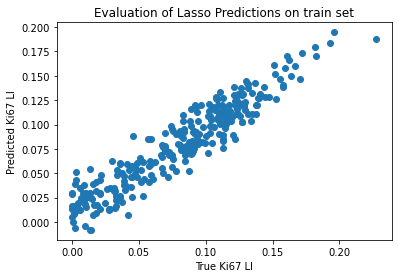

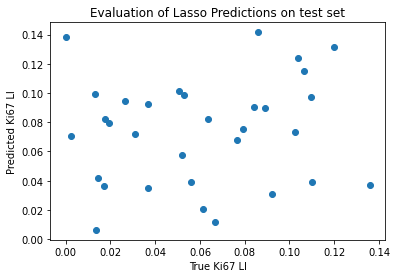

In [59]:
# visualize predictions w respect to the real target in train set
plt.scatter(y_train, lin_model.predict(X_train))
plt.xlabel('True Ki67 LI')
plt.ylabel('Predicted Ki67 LI')
plt.title('Evaluation of Lasso Predictions on train set')
plt.show()

# evaluate our predictions w respect to the real target
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('True Ki67 LI')
plt.ylabel('Predicted Ki67 LI')
plt.title('Evaluation of Lasso Predictions on test set')
plt.show()

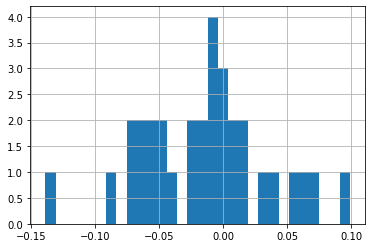

In [60]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed
preds = lin_model.predict(X_test)
errors = y_test['Ki67 LI'] - preds
errors.hist(bins=30)
plt.show()

The distribution of the errors follows quite closely a gaussian distribution. That suggests that our model is doing a good job as well.

### Feature importance

Text(0.5, 1.0, 'Feature Importance')

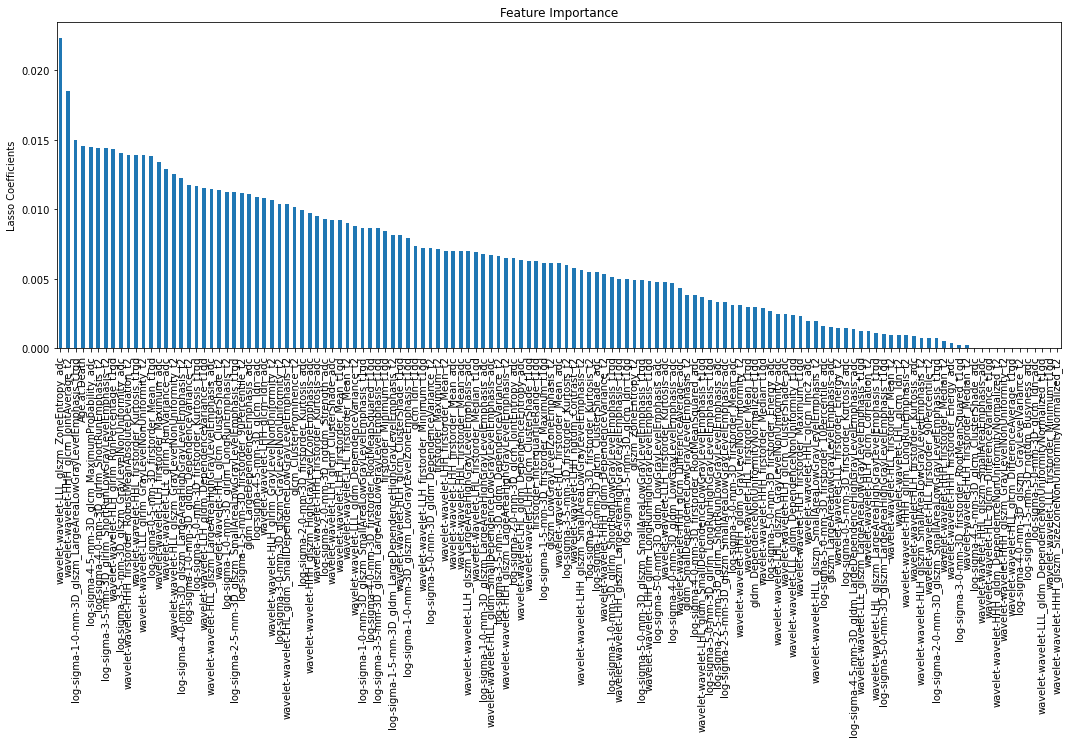

In [61]:
# Finally, just for fun, let's look at the feature importance

importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')

## Save the Model

In [62]:
# we are happy to our model, so we save it to be able
# to score new data

joblib.dump(lin_model, 'lasso.joblib') 

['lasso.joblib']